# Global Configurations

# Initialization

In [1]:
#######################
# HOME_DIR 경로 설정  #
#######################
HOME_DIR = 'D:/Work/Research/AI/wireless/' # 'M:/Archive/Google Drive/'   

SOURCE_CODE_DIR = HOME_DIR + '' # 'Archive/Source Codes/Jupyter/Antenna Selection Exp02/'

####################################################
# Pickle 폴더에 별도 제공된 피클 데이터 파일 복사  #
####################################################
DB_DIR = SOURCE_CODE_DIR + 'Pickle/' # 'C:\Digital Data\Data/'

LOG_DIR = SOURCE_CODE_DIR + 'Logs/'
MODEL_DIR = SOURCE_CODE_DIR + 'Models/'
WEIGHT_DIR = SOURCE_CODE_DIR + 'Weights/'
HISTORY_DIR = SOURCE_CODE_DIR + 'History/'

PYTORCHMODEL_DIR = SOURCE_CODE_DIR + 'PytorchModels/'

DATA_USING = 'H'
LABEL_TYPE = 'hard'
CASE_TYPE = 'short'
INPUT_SHAPE = 'HTH-1D'

ADDITIONAL_STRING = ' mMIMO FC ' + DATA_USING + ' ' + LABEL_TYPE + ' ' + CASE_TYPE

##### Set of Experiments (ONLY for FULLY-CONNECTED NETWORK)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import pickle
import os
import datetime
import time

# Data Loading


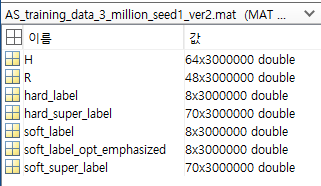

## Load Input File from pickle

## Assign Train and Test Data

In [3]:
file_name_head = "mMIMO_AS_training_data_20000_80_"
file_name_tail = ".pickle"

pickle_H_HTH_ORG_1D = file_name_head + "H_HTH_ORG_1D" + file_name_tail
pickle_labelVal = file_name_head + "labelVal" + file_name_tail
pickle_labelVal01 = file_name_head + "labelVal01" + file_name_tail

pickle_dir_data = DB_DIR + pickle_H_HTH_ORG_1D
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    H_inputVal_all = pickle.load(f)

pickle_dir_data = DB_DIR + pickle_labelVal
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    labelVal_all = pickle.load(f)

pickle_dir_data = DB_DIR + pickle_labelVal01
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    labelVal01_all = pickle.load(f)

D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_H_HTH_ORG_1D.pickle
D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_labelVal.pickle
D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_labelVal01.pickle


In [4]:
numberOfAntenna = 16

no_dataInFile = 20000

############# Training DATA

no_testDataFiles = 78
no_totalData = no_dataInFile * (no_testDataFiles)

if DATA_USING == 'R':
    inputSize = 192     # 2 * 2 * 2 * 2 * 2 * 2 * 3
    inputVal = R_inputVal_all[:no_totalData,:]
elif DATA_USING == 'H':
    inputSize = numberOfAntenna * numberOfAntenna
    inputVal = H_inputVal_all[:no_totalData,:]

labelVal = labelVal_all[:no_totalData,:]
labelVal01 = labelVal01_all[:no_totalData,:]

############# Test DATA

no_valDataFiles = 2
no_totalValData = no_dataInFile * no_valDataFiles


if DATA_USING == 'R':
    inputSize = 192     # 2 * 2 * 2 * 2 * 2 * 2 * 3
    testInputVal = R_inputVal_all[no_totalData:,:]
elif DATA_USING == 'H':
    inputSize = numberOfAntenna * numberOfAntenna
    testInputVal = H_inputVal_all[no_totalData:,:]

if INPUT_SHAPE == 'H-ARI-1D':
    inputSize = 384
    
testLabelVal = labelVal_all[no_totalData:,:]
testLabelVal01 = labelVal01_all[no_totalData:,:]

In [5]:
print(no_totalData)
print(no_totalValData)

if DATA_USING == 'R':
    print(R_inputVal_all.shape)
elif DATA_USING == 'H':
    print(H_inputVal_all.shape)
print(labelVal_all.shape)
print(labelVal01_all.shape)

print('====== INPUT(' + DATA_USING + ') : ' + str(inputVal.shape) + ' ' + str(inputSize))
print(inputVal)
print('====== LABEL : ' + str(labelVal.shape))
print(labelVal)
print('====== LABEL01 : ' + str(labelVal01.shape))
print(labelVal01)

print('================================================')

print('====== TEST INPUT(' + DATA_USING + ') : ' + str(testInputVal.shape) + ' ' + str(inputSize))
print(inputVal)
print('====== TEST LABEL : ' + str(testLabelVal.shape))
print(testLabelVal)
print('====== TEST LABEL01 : ' + str(testLabelVal01.shape))
print(testLabelVal01)

1560000
40000
(1600000, 256)
(1600000, 16)
(1600000, 16)
====== INPUT(H) : (1560000, 256) 256
[[0.43508627 0.23848953 0.17430991 ... 0.1494573  0.30463561 0.75840547]
 [0.91201586 0.14239275 0.35888622 ... 0.19680358 0.33829332 0.82588916]
 [0.38958044 0.19529653 0.12486362 ... 0.25814239 0.1255808  0.33462105]
 ...
 [0.2864378  0.2310919  0.14119503 ... 0.06365318 0.0519114  0.33934222]
 [0.92569351 0.22256976 0.21577545 ... 0.28583585 0.17893457 0.73793588]
 [0.57095904 0.11634311 0.03737261 ... 0.03271034 0.02874345 0.48409718]]
====== LABEL : (1560000, 16)
[[0.04384313 0.05183032 0.07402939 ... 0.07402939 0.05051586 0.07402939]
 [0.04217359 0.02302756 0.0729369  ... 0.07109003 0.0729369  0.0729369 ]
 [0.06612287 0.07401018 0.05073263 ... 0.07401018 0.07401018 0.02408138]
 ...
 [0.0699337  0.04693798 0.06201793 ... 0.0699337  0.0699337  0.04982493]
 [0.08032117 0.08032117 0.08032117 ... 0.08032117 0.04618059 0.08032117]
 [0.07990972 0.02283044 0.07990972 ... 0.07990972 0.02191744 0.

In [6]:
!pip install torch

## Prepare for Data and Metrics 

## Model Setting

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

class WirelessModel (nn.Module):
    def __init__(self, numberOfAntenna):
        super(WirelessModel, self).__init__()

        # layer 1
        self.layer1 = nn.Linear(numberOfAntenna*numberOfAntenna, 491, bias=False)    # numberOfAntenna*numberOfAntenna = 256
        self.bn1 = nn.BatchNorm1d(491)

        # layer 2
        self.layer2 = nn.Linear(491, 491, bias=False)
        self.bn2 = nn.BatchNorm1d(491)

        # layer 3
        self.layer3 = nn.Linear(491, numberOfAntenna, bias=False)     # numberOfAntenna = 16
        self.bn3 = nn.BatchNorm1d(numberOfAntenna)

        nn.init.kaiming_normal_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_normal_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_normal_(self.layer3.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        # layer 1
        x = self.layer1(x)
        x = self.bn1(x)
        x = F.relu(x)

        # layer 2
        x = self.layer2(x)
        x = self.bn2(x)
        x = F.relu(x)

        # layer 3
        x = self.layer3(x)
        x = self.bn3(x)
        x = torch.sigmoid(x)

        return x

wirelessModel = WirelessModel(16)

wirelessModel.to(device)
print(wirelessModel)

cpu
WirelessModel(
  (layer1): Linear(in_features=256, out_features=491, bias=False)
  (bn1): BatchNorm1d(491, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=491, out_features=491, bias=False)
  (bn2): BatchNorm1d(491, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer3): Linear(in_features=491, out_features=16, bias=False)
  (bn3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [8]:
!pip install torchsummary

from torchsummary import summary
summary(wirelessModel, (numberOfAntenna * numberOfAntenna,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 491]         125,696
       BatchNorm1d-2                  [-1, 491]             982
            Linear-3                  [-1, 491]         241,081
       BatchNorm1d-4                  [-1, 491]             982
            Linear-5                   [-1, 16]           7,856
       BatchNorm1d-6                   [-1, 16]              32
Total params: 376,629
Trainable params: 376,629
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.44
Estimated Total Size (MB): 1.45
----------------------------------------------------------------


In [9]:
# 
train_X_all = torch.tensor(inputVal, dtype=torch.float32)
train_Y_all = torch.tensor(labelVal, dtype=torch.float32)
train_Y_01_all = torch.tensor(labelVal01, dtype=torch.float32)

test_X_all = torch.tensor(testInputVal, dtype=torch.float32)
test_Y_all = torch.tensor(testLabelVal, dtype=torch.float32)
test_Y_01_all = torch.tensor(testLabelVal01, dtype=torch.float32)

# for indenendent validation
from sklearn.model_selection import train_test_split

train_X = train_X_all
train_Y = train_Y_01_all

test_X = test_X_all
test_Y = test_Y_01_all

print('Train : Test = ' + str(train_X.shape[0]) + ' : ' + str(test_X.shape[0]))

Train : Test = 1560000 : 40000


## Learning Fully-Connected

### Learning

In [10]:
# after setting train_X_all, train_Y_all, and so on

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import LambdaLR
from sklearn.metrics import accuracy_score, precision_score

train_dataset = TensorDataset(train_X, train_Y)
train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

test_dataset = TensorDataset(test_X, test_Y)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

def piecewise_scheduler_fn(epoch):
    if epoch < 10:
        return 0.005
    elif epoch < 15:
        return 0.0005
    elif epoch < 20:
        return 0.00005
    else:
        return 0.000005

criterion = nn.BCELoss()
optimizer = optim.Adam(wirelessModel.parameters(), lr=0.01)
scheduler = LambdaLR(optimizer, lr_lambda=piecewise_scheduler_fn)

# 훈련
num_epochs = 25
history = {'loss': [], 'accuracy': [], 'precision': []}

for epoch in range(num_epochs):
    wirelessModel.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = wirelessModel(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    scheduler.step()
    history['loss'].append(running_loss / len(train_loader))
    
    # 검증
    wirelessModel.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = wirelessModel(inputs)
            preds = outputs.round()
            all_preds.append(preds)
            all_labels.append(labels)
    
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    test_acc = accuracy_score(all_labels, all_preds)
    test_precision = precision_score(all_labels, all_preds, average='macro') # 평균 옵션은 필요에 따라 조정
    
    history['accuracy'].append(test_acc)
    history['precision'].append(test_precision)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Accuracy: {test_acc}, Precision: {test_precision}")

# 최종 평가
wirelessModel.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = wirelessModel(inputs)
        preds = outputs.round()
        all_preds.append(preds)
        all_labels.append(labels)

all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)
test_loss = criterion(all_preds, all_labels).item()
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro')

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}")


Epoch 1/25, Loss: 0.5757917238733707, Accuracy: 0.00655, Precision: 0.7560731045422694
Epoch 2/25, Loss: 0.5218047699867151, Accuracy: 0.0094, Precision: 0.7651076631103859
Epoch 3/25, Loss: 0.5066308940641391, Accuracy: 0.011275, Precision: 0.7665315729845483
Epoch 4/25, Loss: 0.4961457886756995, Accuracy: 0.0124, Precision: 0.7668414885838455
Epoch 5/25, Loss: 0.4882283703256876, Accuracy: 0.01285, Precision: 0.7678272098171337
Epoch 6/25, Loss: 0.48198734477926525, Accuracy: 0.01355, Precision: 0.7683954669488653
Epoch 7/25, Loss: 0.47691609987463707, Accuracy: 0.01405, Precision: 0.7690062741960924
Epoch 8/25, Loss: 0.47272780623573524, Accuracy: 0.0143, Precision: 0.7701165544075449
Epoch 9/25, Loss: 0.4692247117177034, Accuracy: 0.014675, Precision: 0.7711713803719398
Epoch 10/25, Loss: 0.46629770843264384, Accuracy: 0.01545, Precision: 0.7720764820922226
Epoch 11/25, Loss: 0.46441333626325315, Accuracy: 0.0154, Precision: 0.7723239611259209
Epoch 12/25, Loss: 0.4641208424973182,

In [11]:
torch.save(wirelessModel.state_dict(), PYTORCHMODEL_DIR + 'wirelessmodel.pt')

In [12]:
######################################
# auto_LiRPA를 git으로 1회 내려받기  #
######################################

git clone https://github.com/Verified-Intelligence/auto_LiRPA


#########################################################
# auto_LiRPA/setup.py 인코딩 문제를 해결하기 위해 편집  #
#########################################################
# EDIT setup.py as explained in https://github.com/kwanghoon/NNV/blob/main/liRPA-Guide.md
#
#   - with open('auto_LiRPA/__init__.py') as file:
#   => with open('auto_LiRPA/__init__.py', encoding="utf-8") as file:
#
#   - long_description = (this_directory / 'README.md').read_text()
#   => long_description = (this_directory / 'README.md').read_text(encoding='utf8')

!pip install ./auto_LiRPA

Processing c:\users\khchoi\auto_lirpa
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for auto-LiRPA: filename=auto_LiRPA-0.5.0-py3-none-any.whl size=241438 sha256=040c0415cd527ea85826dd98e82f3e8fbb2af3df5cd5979bd8377cbd2120c973
  Stored in directory: C:\Users\khchoi\AppData\Local\Temp\pip-ephem-wheel-cache-qhjxp6tl\wheels\a8\e2\7d\8203ffd69358cc1ba99d2ea4d0b4c2a90612274ff12adf3232
Successfully built auto-LiRPA
  Attempting uninstall: auto-LiRPA
    Found existing installation: auto-LiRPA 0.5.0
    Uninstalling auto-LiRPA-0.5.0:
      Successfully uninstalled auto-LiRPA-0.5.0


In [13]:
from auto_LiRPA import BoundedModule, BoundedTensor
from auto_LiRPA.perturbations import PerturbationLpNorm
from auto_LiRPA.utils import Flatten
from collections import defaultdict

In [14]:
model = wirelessModel
# Optionally, load the pretrained weights.
checkpoint = torch.load(
    PYTORCHMODEL_DIR + 'wirelessmodel.pt',
    map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [15]:
test_X_1 = test_X[:1].view(1,256)
test_Y_1 = test_Y[:1]


print(test_X[:1])
print(test_X_1.size())
print(test_X_1)
print(test_Y_1.size())
print(test_Y_1)

tensor([[0.3135, 0.0312, 0.1237, 0.0697, 0.0584, 0.0958, 0.1386, 0.1761, 0.0653,
         0.0926, 0.1379, 0.1802, 0.2131, 0.1445, 0.1582, 0.1315, 0.0312, 0.4954,
         0.1145, 0.2049, 0.0859, 0.0604, 0.2991, 0.1488, 0.0797, 0.1100, 0.2388,
         0.0970, 0.2481, 0.3114, 0.1523, 0.1424, 0.1237, 0.1145, 0.5205, 0.2187,
         0.1907, 0.2574, 0.2875, 0.1364, 0.1351, 0.3261, 0.1578, 0.1495, 0.1989,
         0.2175, 0.1790, 0.1931, 0.0697, 0.2049, 0.2187, 0.7593, 0.1233, 0.0834,
         0.1942, 0.1764, 0.1923, 0.2431, 0.2170, 0.0132, 0.4197, 0.3466, 0.2156,
         0.0490, 0.0584, 0.0859, 0.1907, 0.1233, 0.2884, 0.1881, 0.1175, 0.0715,
         0.1580, 0.1140, 0.0334, 0.1368, 0.0479, 0.0896, 0.1178, 0.1432, 0.0958,
         0.0604, 0.2574, 0.0834, 0.1881, 0.4371, 0.0964, 0.1069, 0.2520, 0.2525,
         0.0525, 0.0969, 0.1274, 0.2761, 0.1822, 0.1812, 0.1386, 0.2991, 0.2875,
         0.1942, 0.1175, 0.0964, 0.7052, 0.1115, 0.0919, 0.3309, 0.2054, 0.3563,
         0.1553, 0.2626, 0.2

In [16]:
# model.eval() ??
lirpa_model = BoundedModule(model, torch.empty_like(test_X_1), device='cpu')

Answer:  tensor([[1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.]])
Prediction:  tensor([[0.1375, 0.4094, 0.2900, 0.8915, 0.1799, 0.3817, 0.7640, 0.3775, 0.3559,
         0.0490, 0.7120, 0.8267, 0.9792, 0.6895, 0.0547, 0.8258]],
       grad_fn=<SigmoidBackward0>)
Bounding method: IBP
0:    0.000 <= f_0(x_0+eps) <=    1.000 (*)
1:    0.000 <= f_1(x_0+eps) <=    1.000 
2:    0.000 <= f_2(x_0+eps) <=    1.000 (*)
3:    0.000 <= f_3(x_0+eps) <=    1.000 (*)
4:    0.000 <= f_4(x_0+eps) <=    1.000 
5:    0.000 <= f_5(x_0+eps) <=    1.000 
6:    0.000 <= f_6(x_0+eps) <=    1.000 
7:    0.000 <= f_7(x_0+eps) <=    1.000 
8:    0.000 <= f_8(x_0+eps) <=    1.000 
9:    0.000 <= f_9(x_0+eps) <=    1.000 
10:    0.000 <= f_10(x_0+eps) <=    1.000 (*)
11:    0.000 <= f_11(x_0+eps) <=    1.000 (*)
12:    0.000 <= f_12(x_0+eps) <=    1.000 (*)
13:    0.000 <= f_13(x_0+eps) <=    1.000 (*)
14:    0.000 <= f_14(x_0+eps) <=    1.000 
15:    0.000 <= f_15(x_0+eps) <=    1.000 (*)


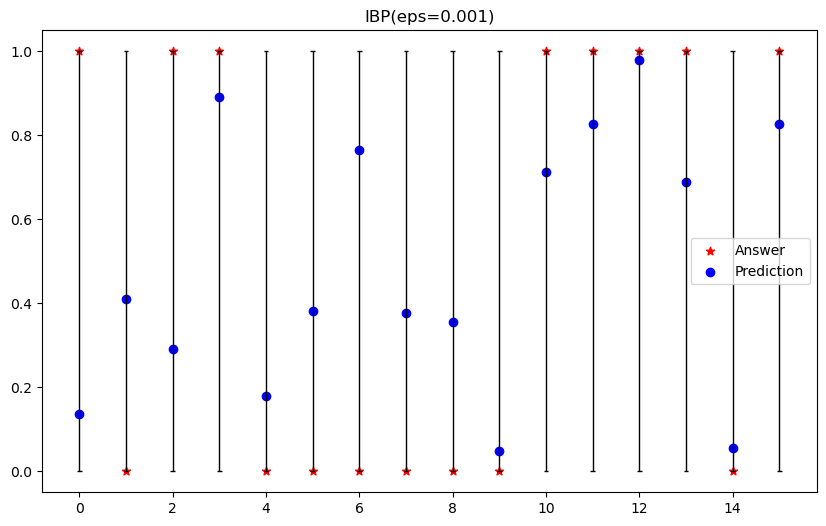


Bounding method: IBP+backward (CROWN-IBP)
0:   -0.114 <= f_0(x_0+eps) <=    0.980 (*)
1:   -0.059 <= f_1(x_0+eps) <=    1.042 
2:   -0.112 <= f_2(x_0+eps) <=    0.988 (*)
3:    0.065 <= f_3(x_0+eps) <=    1.195 (*)
4:   -0.110 <= f_4(x_0+eps) <=    0.972 
5:   -0.073 <= f_5(x_0+eps) <=    1.022 
6:   -0.001 <= f_6(x_0+eps) <=    1.102 
7:   -0.068 <= f_7(x_0+eps) <=    1.045 
8:   -0.079 <= f_8(x_0+eps) <=    1.020 
9:   -0.200 <= f_9(x_0+eps) <=    0.914 
10:    0.004 <= f_10(x_0+eps) <=    1.111 (*)
11:    0.029 <= f_11(x_0+eps) <=    1.139 (*)
12:    0.155 <= f_12(x_0+eps) <=    1.353 (*)
13:   -0.004 <= f_13(x_0+eps) <=    1.101 (*)
14:   -0.176 <= f_14(x_0+eps) <=    0.921 
15:    0.020 <= f_15(x_0+eps) <=    1.126 (*)


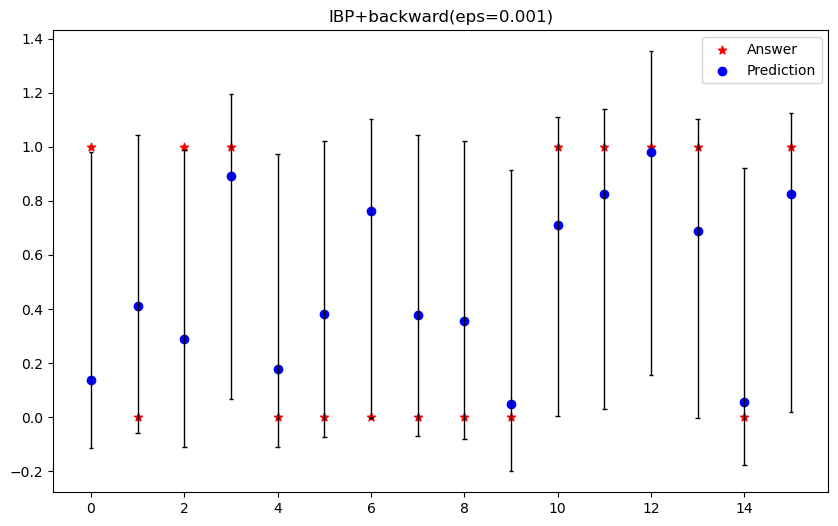


Bounding method: backward (CROWN)
0:    0.102 <= f_0(x_0+eps) <=    0.185 (*)
1:    0.342 <= f_1(x_0+eps) <=    0.483 
2:    0.232 <= f_2(x_0+eps) <=    0.358 (*)
3:    0.865 <= f_3(x_0+eps) <=    0.913 (*)
4:    0.137 <= f_4(x_0+eps) <=    0.230 
5:    0.306 <= f_5(x_0+eps) <=    0.460 
6:    0.708 <= f_6(x_0+eps) <=    0.809 
7:    0.293 <= f_7(x_0+eps) <=    0.457 
8:    0.288 <= f_8(x_0+eps) <=    0.431 
9:    0.035 <= f_9(x_0+eps) <=    0.068 
10:    0.645 <= f_10(x_0+eps) <=    0.768 (*)
11:    0.789 <= f_11(x_0+eps) <=    0.861 (*)
12:    0.975 <= f_12(x_0+eps) <=    0.983 (*)
13:    0.643 <= f_13(x_0+eps) <=    0.745 (*)
14:    0.038 <= f_14(x_0+eps) <=    0.073 
15:    0.786 <= f_15(x_0+eps) <=    0.865 (*)


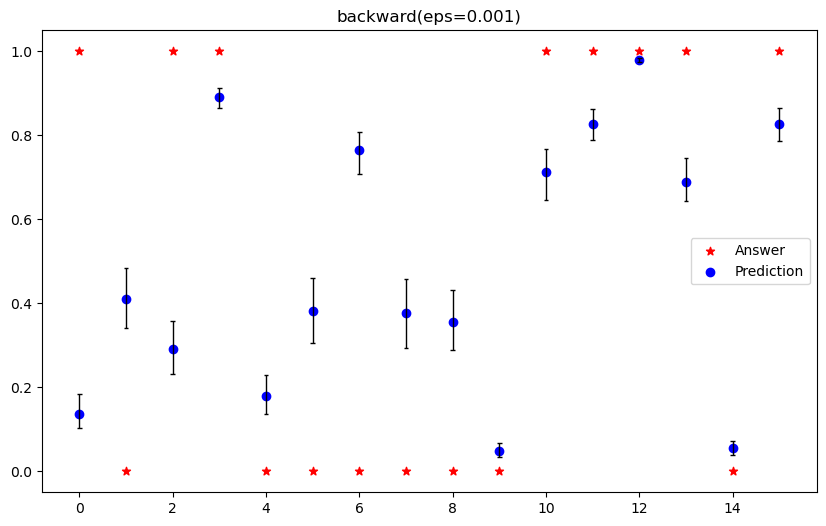


Bounding method: CROWN-Optimized (alpha-CROWN)


AssertionError: 

In [17]:
eps = 0.001
norm = float("inf")
ptb = PerturbationLpNorm(norm = norm, eps = eps)
test_X_1 = BoundedTensor(test_X_1, ptb)

pred = lirpa_model(test_X_1)
#label = torch.argmax(pred, dim=1).cpu().detach().numpy()

# print(test_X_1)
# print(test_Y_1)
print('Answer: ', test_Y_1)

print('Prediction: ', pred)


for method in [
    'IBP', 'IBP+backward (CROWN-IBP)', 'backward (CROWN)',
        'CROWN-Optimized (alpha-CROWN)']:
    print('Bounding method:', method)
    if 'Optimized' in method:
        lirpa_model.set_bound_opts({'optimize_bound_args': {'iteration': 20, 'lr_alpha': 0.1}})
    lb, ub = lirpa_model.compute_bounds(x=(test_X_1,), method=method.split()[0])

    for j in range(16):
        indicator = '(*)' if test_Y_1[0][j] >= 1.0 else ''
        print('{j}: {l:8.3f} <= f_{j}(x_0+eps) <= {u:8.3f} {ind}'.format(
                j=j, l=lb[0][j].item(), u=ub[0][j].item(), ind=indicator))

    xaxis = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

    plt.figure(figsize=(10,6))

    # answer와 prediction값 표시
    plt.scatter(xaxis, test_Y_1.tolist(), color='red', marker='*', label='Answer')
    plt.scatter(xaxis, pred.tolist(), color='blue', label='Prediction')
    
    # lb값과 up값 표시
    # plt.scatter(xaxis, lb[0].tolist(), color='red', marker='lb', label='Lower Bound')
    # plt.scatter(xaxis, ub[0].tolist(), color='green', marker='ub', label='Upper Bound')

    lb_list = lb[0].tolist()
    ub_list = ub[0].tolist()
    
    for j in range(16):
        plt.vlines(x=j, ymin=lb_list[j], ymax=ub_list[j], color='black', linewidth=1)
        plt.hlines(y=lb_list[j], xmin=j-0.05, xmax=j+0.05, color='black', linewidth=1)
        plt.hlines(y=ub_list[j], xmin=j-0.05, xmax=j+0.05, color='black', linewidth=1)

    # plt.xlabel('X-axis')
    # plt.ylabel('Y-axis')
    plt.title(method.split()[0] + "(eps=" + str(eps) + ")")
    plt.legend()
    # plt.grid(True)

    plt.show()

    print()